In [96]:
from pathlib import Path
import geopandas as gpd
import fiona
import pandas as pd
files = list(Path(r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\200 Technical\202 General\KMZs").glob("*.kmz"))
# file = Path(r"\\ppeng.com\pzdata\clients\Arvin-Edison WSD-1215\121523003-Frick Unit Pipeline\200 Technical\202 General\KMZs\2023-0620 Frick Unit Pipeline Aligment.kmz")

In [168]:
from pykml import parser
from shapely.geometry import Point, LineString, Polygon
import zipfile

# Step 1: Extract KML data from KMZ file
kmz_file = files[2]
with zipfile.ZipFile(kmz_file, 'r') as kmz:
    # kml = kmz.open(, 'r').read().decode('utf-8')
    print(kmz.filelist[0].filename)
    kml_data = kmz.read(kmz.filelist[0].filename)  # Assuming 'doc.kml' is the main KML file

# Step 2: Parse KML data
root = parser.fromstring(kml_data)
print(root.Document.name)
print(root.Document.Folder.name)
print(root.Document.Folder.Placemark.name)
pls = [i for i in root.Document.Folder.Placemark][0]
# pls.text
root.Document.Folder.Placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text

# Step 3: Convert KML data to GeoDataFrame

def kml_to_gdf(root):
    """
    Convert KML data to GeoDataFrame
    """
    # Extract data from KML
    name = root.Document.name
    # description = root.Document.description
    coords = root.Document.Folder.Placemark.Polygon.outerBoundaryIs.LinearRing.coordinates.text
    coords = coords.replace('\n', '').split(' ')
    coords = [i.split(',') for i in coords]
    print(coords)
    coords = [(float(i[0]), float(i[1])) for i in coords if len(i) == 3]
    # Convert data to GeoDataFrame
    gdf = gpd.GeoDataFrame({
        'name': name,
        # 'description': description,
        'geometry': [Polygon(coords)]})
    return gdf
gdf = kml_to_gdf(root)

doc.kml
Frick Unit Areas.kmz
Areas
DOSANJH 280-1
[['\t\t\t\t\t\t\t-118.9142125262113', '35.31803624209412', '0'], ['-118.9053596688428', '35.31805517175397', '0'], ['-118.9053756803374', '35.32161642303544', '0'], ['-118.9097372939736', '35.3216407592823', '0'], ['-118.9098478119167', '35.32336503998427', '0'], ['-118.9117047012484', '35.32335681710946', '0'], ['-118.9119285821969', '35.32337841306575', '0'], ['-118.9119989218395', '35.32284845610921', '0'], ['-118.9141807193072', '35.32232021472609', '0'], ['-118.9142125262113', '35.31803624209412', '0'], ['\t\t\t\t\t\t']]


<Axes: >

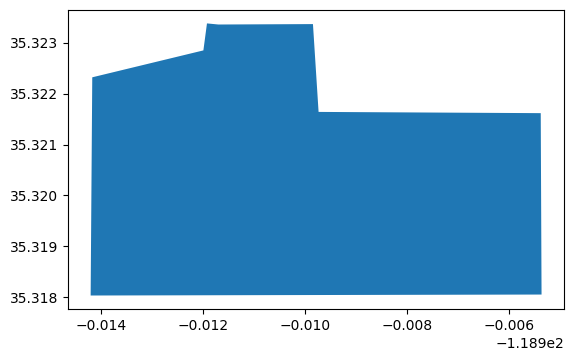

In [164]:
gdf.plot()

In [107]:
placemarks = root.Document.Folder.Placemark
# print(placemarks)

# Step 3: Convert KML geometries to Shapely geometries
shapely_geometries = []
for placemark in placemarks:
    geometry = placemark.geometry
    if isinstance(geometry, parser.geometry.Point):
        coords = (float(geometry.coordinates.split(',')[0]),
            float(geometry.coordinates.split(',')[1]))
        shapely_geometry = Point(coords)
    elif isinstance(geometry, parser.geometry.LineString):
        coords = [(float(coord.split(',')[0]), float(coord.split(',')[1]))
            for coord in geometry.coordinates.split()]
        shapely_geometry = LineString(coords)
    elif isinstance(geometry, parser.geometry.Polygon):
        outer_coords = [(float(coord.split(',')[0]), float(coord.split(',')[1]))
                        for coord in geometry.outerBoundaryIs.LinearRing.coordinates.split()]
        inner_coords = []
        for inner_ring in geometry.innerBoundaryIs:
            inner_coords.append([(float(coord.split(',')[0]), float(coord.split(',')[1]))
                for coord in inner_ring.LinearRing.coordinates.split()])
        shapely_geometry = Polygon(shell=outer_coords, holes=inner_coords)
    
    shapely_geometries.append(shapely_geometry)

# Use the converted Shapely geometries as desired
for geometry in shapely_geometries:
    print(geometry)


AttributeError: no such child: {http://www.opengis.net/kml/2.2}geometry

In [90]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from xml.dom.minidom import parse, parseString
from zipfile import ZipFile
# Open the KML file

# dom = parse('travel.kml')
with ZipFile(file, 'r') as kmz:
	kml = kmz.open(kmz.filelist[0].filename, 'r').read().decode('utf-8')
	dom = parseString(kml)
# Define a function to get the path of a placemark

def subfolders(node):
	if node.parentNode == dom.documentElement:
		return ""
	else:
		foldername = node.getElementsByTagName("name")[0].firstChild.data
		path = subfolders(node.parentNode) + "/" + foldername
	return path

# Parse the DOM of the KML
# For each Placemark, get a tuple of name, lat, long, foldername and path
# Append the tuple to a list of tuples

entries = []
placemarks = dom.getElementsByTagName("Placemark")


for i in placemarks:
	longitude = i.getElementsByTagName("longitude")[0].firstChild.data
	latitude = i.getElementsByTagName("latitude")[0].firstChild.data
	try:
		name = i.getElementsByTagName("name")[0].firstChild.data
	except:
		name = ""
	parent = i.parentNode
	foldername = parent.getElementsByTagName("name")[0].firstChild.data
	path = subfolders(parent) 
	entries.append((name, latitude, longitude, foldername, path)) # List of tuples


df = pd.DataFrame(entries, columns=('name', 'latitude', 'longitude', 'folder', 'path'))
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude, crs="EPSG:4326"))

IndexError: list index out of range

In [78]:
import geopandas as gpd
import fiona

# Enable KML drivers for Fiona
fiona.drvsupport.supported_drivers['kml'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'
fiona.supported_drivers['KML'] = 'rw'
fiona.supported_drivers['KML'] = 'rw'

from zipfile import ZipFile
from bs4 import BeautifulSoup
gpd.io.file.fiona.drvsupport.supported_drivers['LIBKML'] = 'rw'



with ZipFile(file, 'r') as kmz:
	kml = kmz.open(kmz.filelist[0].filename, 'r').read().decode('utf-8')
	# gdf = gpd.read_file(kml)
	# soup = BeautifulSoup(kml, 'html.parser')
	gdf = gpd.read_file(
		kml,
		driver='LIBKML',
		# buffer=True
		)
	
# kmz.extract('doc.kml', tempDir)
# gdf = gpd.read_file(os.path.join(tempDir, 'doc.kml'))

# Read the KML file with GeoPandas

# Explore the GeoDataFrame object
# print(gdf.head())
gdf.head()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "fiona\ogrext.pyx", line 136, in fiona.ogrext.gdal_open_vector
  File "fiona\_err.pyx", line 291, in fiona._err.exc_wrap_pointer
fiona._err.CPLE_OpenFailedError: '<?xml version="1.0" encoding="UTF-8"?> <kml xmlns="http://www.opengis.net/kml/2.2" xmlns:gx="http://www.google.com/kml/ext/2.2" xmlns:kml="http://www.opengis.net/kml/2.2" xmlns:atom="http://www.w3.org/2005/Atom"> <Document> 	<name>Frick Unit Pipeline</name> 	<description>2023-0620</description> 	<LookAt> 		<longitude>-118.8727466340894</longitude> 		<latitude>35.31267383667717</latitude> 		<altitude>0</altitude> 		<heading>-4.7187195879059e-08</heading> 		<tilt>0</tilt> 		<range>10343.15993487714</range> 		<gx:altitudeMode>relativeToSeaFloor</gx:altitudeMode> 	</LookAt> 	<Folder> 		<name>Cameras</name> 	</Folder> 	<Folder> 		<name>Paths</name> 	</Folder> 	<Folder> 		<name>Model</name> 		<Folder> 			<name>Polyline [17F0]</name> 			<Placemark> 				<name>Polyline [17F0]:0</name> 				<Sty

In [64]:
# import geotable
# t = geotable.load(file)
# t

In [43]:
from zipfile import ZipFile

def openKMZ(filename):
    zip=ZipFile(filename)
    for z in zip.filelist:
        if z.filename[-4:] == '.kml':
            fstring=zip.read(z)
            print(fstring)
            break
openKMZ(file)
# fstring

b'<?xml version="1.0" encoding="UTF-8"?>\n<kml xmlns="http://www.opengis.net/kml/2.2" xmlns:gx="http://www.google.com/kml/ext/2.2" xmlns:kml="http://www.opengis.net/kml/2.2" xmlns:atom="http://www.w3.org/2005/Atom">\n<Document>\n\t<name>Frick Unit Pipeline</name>\n\t<description>2023-0620</description>\n\t<LookAt>\n\t\t<longitude>-118.8727466340894</longitude>\n\t\t<latitude>35.31267383667717</latitude>\n\t\t<altitude>0</altitude>\n\t\t<heading>-4.7187195879059e-08</heading>\n\t\t<tilt>0</tilt>\n\t\t<range>10343.15993487714</range>\n\t\t<gx:altitudeMode>relativeToSeaFloor</gx:altitudeMode>\n\t</LookAt>\n\t<Folder>\n\t\t<name>Cameras</name>\n\t</Folder>\n\t<Folder>\n\t\t<name>Paths</name>\n\t</Folder>\n\t<Folder>\n\t\t<name>Model</name>\n\t\t<Folder>\n\t\t\t<name>Polyline [17F0]</name>\n\t\t\t<Placemark>\n\t\t\t\t<name>Polyline [17F0]:0</name>\n\t\t\t\t<Style>\n\t\t\t\t\t<LineStyle>\n\t\t\t\t\t\t<color>fffefe00</color>\n\t\t\t\t\t\t<width>2</width>\n\t\t\t\t\t</LineStyle>\n\t\t\t\t</Sty

In [59]:
from xml.dom.minidom import parseString

def openKMZ(filename):
	zip=ZipFile(filename)
	for z in zip.filelist:
		if z.filename[-4:] == '.kml':
			fstring=zip.read(z)
			break
	else:
		raise Exception("Could not find kml file in %s" % filename)
	return fstring

def openKML(filename):
	try:
		fstring=openKMZ(filename)
	except Exception:
		fstring=open(filename,'r').read()
	return parseString(fstring)

def readPoly(filename):
	def parseData(d):
		dlines=d.split()
		poly=[]
		for l in dlines:
			l=l.strip()
			if l:
				point=[]
				for x in l.split(','):
					point.append(float(x))
				poly.append(point[:2])
		return poly

	xml=openKML(filename)
	nodes=xml.getElementsByTagName('Placemark')
	desc={}
	print(nodes)
	for n in nodes:
		names=n.getElementsByTagName('name')
		try:
			desc['name']=names[0].childNodes[0].data.strip()
		except Exception:
			pass
		
		descriptions=n.getElementsByTagName('description')
		try:
			desc['description']=names[0].childNodes[0].data.strip()
		except Exception:
			pass

		times=n.getElementsByTagName('TimeSpan')
		try:
			desc['beginTime']=times[0].getElementsByTagName('begin')[0].childNodes[0].data.strip()
			desc['endTime'  ]=times[0].getElementsByTagName('end'  )[0].childNodes[0].data.strip()
		except Exception:
			pass

		times=n.getElementsByTagName('TimeStamp')
		try:
			desc['timeStamp']=times[0].getElementsByTagName('when')[0].childNodes[0].data.strip()
		except Exception:
			pass
		print(desc)
		

			
		polys=n.getElementsByTagName('Polygon')
		for poly in polys:
			print(poly)
			invalid=False
			c=n.getElementsByTagName('coordinates')
			if len(c) != 1:
				print('invalid polygon found')
				continue
			if not invalid:
				c=c[0]
				d=c.childNodes[0].data.strip()
				data=parseData(d)
				yield (data,desc)
				print(data)
				print(desc)
	# return polys

[i for i in readPoly(file)]

[<DOM Element: Placemark at 0x23e74a5dfc0>, <DOM Element: Placemark at 0x23e74a3f6d0>, <DOM Element: Placemark at 0x23e74a9b5b0>, <DOM Element: Placemark at 0x23e74a9ae60>, <DOM Element: Placemark at 0x23e74a99a20>]
{'name': 'Polyline [17F0]:0', 'description': 'Polyline [17F0]:0'}
{'name': 'Polyline [174F]:0', 'description': 'Polyline [174F]:0'}
{'name': 'Polyline [1718]:0', 'description': 'Polyline [1718]:0'}
{'name': 'Polyline [1700]:0', 'description': 'Polyline [1700]:0'}
{'name': 'Polyline [166E]:0', 'description': 'Polyline [166E]:0'}


[]

In [ ]:

# def latlon2meters(p):
#     pi2=2.*math.pi
#     reradius=1./6370000
#     alat=0
#     alon=0
#     for i in p:
#         alon=alon+i[0]
#         alat=alat+i[1]
#     lon_ctr=alon/len(p)
#     lat_ctr=alat/len(p)
#     unit_fxlat=pi2/(360. * reradius)
#     unit_fxlon=math.cos(lat_ctr*pi2/360.) * unit_fxlat

#     q=[]
#     olon=p[0][0]
#     olat=p[0][1]
#     for i in p:
#         q.append( ( (i[0] - olon) * unit_fxlon , \
#                     (i[1] - olat) * unit_fxlat ) )
#     return q

# def polyStats(p):
#     pm=Polygon(latlon2meters(p))
#     area=pm.area()
#     numpts=len(p)
#     pl=Polygon(p)
#     bbox=pl.boundingBox()
#     center=pl.center()

#     stat=\
#             {'vertices':'%i' % numpts,
#              'bounding box':'(%f , %f) - (%f , %f)' % (bbox[0],bbox[2],bbox[1],bbox[3]),
#              'center':'(%f , %f)' % (center[0],center[1]),
#              'area':'%f m^2' % (area) }
#     return stat

# def makepoly(p):
#     return Polygon(p)

# def intersect(p1,p2):
#     q1=makepoly(p1)
#     q2=makepoly(p2)

#     q=q1 & q2

#     return q

# def get_area(p):
#     q=makepoly(p)
#     return p.area()

# def write_poly(p,fname):
#     if isinstance(fname,basestring):
#         f=open(fname,'w')
#     else:
#         f=fname
#     for i in p:
#         f.write('%19.16f,%19.16f,0.\n' % (i[0],i[1]))
#     f.flush()

# def read_poly(fname):
#     if isinstance(fname,basestring):
#         f=open(fname,'r')
#     else:
#         f=fname
#     s=f.readlines()
#     p=[]
#     for i in s:
#         i=i.strip()
#         j=i.split(',')
#         p.append((float(j[0]),float(j[1])))
#     return p

# # def poly2kmz(pp,fname):
# #     strs=[]
# #     i=0
# #     for p in pp:
# #         i=i+1
# #         f=StringIO()
# #         write_poly(p,f)
# #         strs.append(polystr % (i,f.getvalue()))
# #     s='\n'.join(strs)
# #     s=kmlstr % (fname,s)
# #     open(fname,'w').write(s)

# # if __name__ == '__main__':
# #     import sys
# #     fname=sys.argv[1]
# #     i=0
# #     for p in readPoly(fname):
# #         p,desc=p
# #         i=i+1
# #         stats=polyStats(p)
# #         desc.update(stats)
# #         print 'Polygon #%i' % i
# #         for d,v in desc.iteritems():
# #             print '%16s: %s' % (d,v)
# #         print ''

In [21]:
from zipfile import ZipFile
from bs4 import BeautifulSoup
with ZipFile(file, 'r') as kmz:
    kml = kmz.open(kmz.filelist[0].filename, 'r').read()
    # df = pd.read_xml(kml)
    
soup = BeautifulSoup(kml, 'xml')
# df.loc[0]

name           Frick Unit Pipeline
description              2023-0620
LookAt                         NaN
Folder                         NaN
Name: 0, dtype: object

In [39]:
# from shapely.geometry import Point

# locs = [placemark.find('coordinates').text.replace("\n","").replace("\t","") for placemark in soup.find_all('Placemark')]
# # convert to geodataframe
# gdf = gpd.GeoDataFrame(geometry=[Point(eval(loc)) for loc in locs])
# gdf
folder = kml

plnm=[]
cordi=[]
for pm in folder.Placemark:
    plnm1=pm.name
    plcs1=pm.Point.coordinates
    plnm.append(plnm1.text)
    cordi.append(plcs1.text)
    
db=pd.DataFrame()
db['place_name']=plnm
db['cordinates']=cordi

def dump(obj):
    for attr in dir(obj):
        if hasattr( obj, attr ):
            print( "obj.%s = %s" % (attr, getattr(obj, attr)))
#the kml output plnm1 and plcs1 are objects actually which can be viewed using the dump function from [SO](https://blender.stackexchange.com/questions/1879/is-it-possible-to-dump-an-objects-properties-and-methods)

db['Longitude'], db['Latitude'],db['value'] = zip(*db['cordinates'].apply(lambda x: x.split(',', 2)))


AttributeError: 'bytes' object has no attribute 'Placemark'

In [9]:
pd.read_xml(file)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 14: invalid start byte

In [63]:
soup
titles = soup.find_all(str("LineString"))
coor=[]
for title in titles:
    coor.append(title.get_text())
import shlex
liste_0 =[]
for i in range(len(coor)):
    a = shlex.split(coor[i], posix=False)
    liste_0.append(a)
import pandas as pd
df_0 = pd.DataFrame(liste_0)#.transpose()

df_0.head(10)
# df_0[['Lat', 'Long', 'Alt']] = df_0.column.str.split(",",expand=True)
# 

,0,1,2,3,4,5,6,7,8,9
0,"-118.8875279996108,35.3216886353945,0","-118.8875347701659,35.3216885288669,0",None,None,None,None,None,None,None,None
1,"-118.8875347701669,35.3216885288659,0","-118.8876291002879,35.3216879438073,0",None,None,None,None,None,None,None,None
2,"-118.8876291002889,35.3216879438063,0","-118.8908222464394,35.321677391674,0",None,None,None,None,None,None,None,None
3,"-118.8908222464404,35.321677391673,0","-118.8909277844482,35.321676378231,0",None,None,None,None,None,None,None,None
4,"-118.8909277844491,35.32167637823,0","-118.8918487231666,35.3216712864411,0",None,None,None,None,None,None,None,None
5,"-118.8918487231676,35.3216712864401,0","-118.8925768203658,35.3216682260936,0",None,None,None,None,None,None,None,None
6,"-118.8925768203668,35.3216682260926,0","-118.8926612427879,35.3216692820513,0",None,None,None,None,None,None,None,None
7,"-118.8926612427889,35.3216692820503,0","-118.8944882379982,35.3216610641863,0",None,None,None,None,None,None,None,None
8,"-118.8944882379992,35.3216610641853,0","-118.8956068446014,35.3216565821655,0",None,None,None,None,None,None,None,None
9,"-118.8956068446024,35.3216565821645,0","-118.8956906093132,35.321656514372,0",None,None,None,None,None,None,None,None


In [ ]:
# gpd.io.file.
# fiona.drvsupport.supported_drivers['KML'] = 'rw'
fiona.drvsupport.supported_drivers['KML'] = 'rw'

# gdf = gpd.read_file(file,driver='KML',layer='Frick Unit Pipeline Aligment')
# df = gpd.GeoDataFrame()
df = gpd.read_file(file, driver='KML')


In [8]:
df

""


In [ ]:

# iterate over layers
for layer in fiona.listlayers(file):
    print(layer)
    # s = gpd.read_file(file, driver='KML', layer=layer)
    # df = pd.concat([df, s], ignore_index=True)